C:\Users\admin1\AppData\Roaming\Python\Python310\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


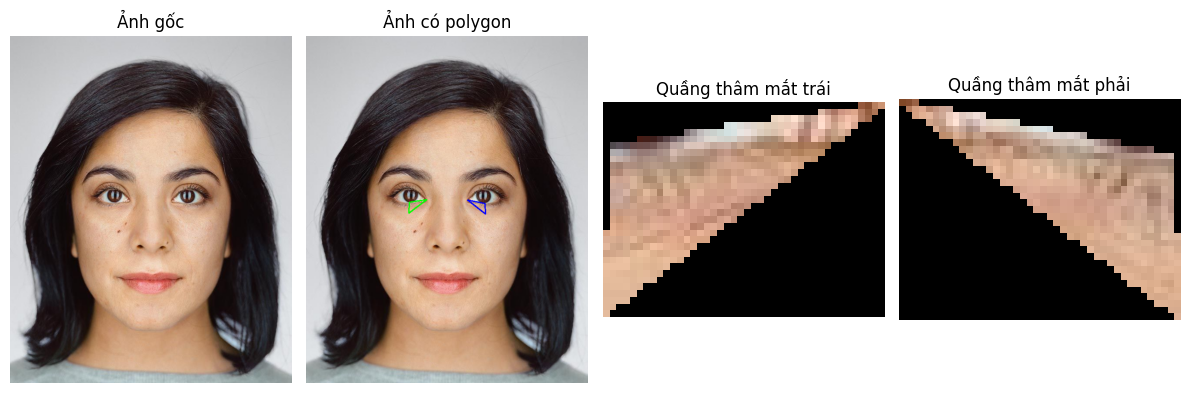

In [5]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# ======= 1. Cấu hình ảnh =======

IMAGE_PATH="D:/KLTN/SKINTONE/public/test4/0c4e7473e7e82503bf1dc2d2328112a6.jpg"
# ======= 2. Khởi tạo FaceMesh =======
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# ======= 3. Landmark polygon tam giác dưới mắt =======
LEFT_TRIANGLE_IDS = [145, 133, 230]   # Mắt trái
RIGHT_TRIANGLE_IDS = [374, 362, 450]  # Mắt phải

# ======= 4. Hàm trích xuất vùng polygon =======
def extract_triangle_region(image, landmarks, indices):
    h, w, _ = image.shape
    points = np.array([(int(landmarks[i].x * w), int(landmarks[i].y * h)) for i in indices], np.int32)

    # Tạo mask và cắt ảnh theo polygon
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillConvexPoly(mask, points, 255)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Crop bounding box quanh polygon
    x, y, w_box, h_box = cv2.boundingRect(points)
    result_cropped = result[y:y+h_box, x:x+w_box]

    return result_cropped, points

# ======= 5. Xử lý ảnh =======
image = cv2.imread(IMAGE_PATH)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb)

if results.multi_face_landmarks:
    landmarks = results.multi_face_landmarks[0].landmark

    # Trích mắt trái
    left_crop, left_pts = extract_triangle_region(image, landmarks, LEFT_TRIANGLE_IDS)

    # Trích mắt phải
    right_crop, right_pts = extract_triangle_region(image, landmarks, RIGHT_TRIANGLE_IDS)

    # Ảnh gốc vẽ polygon
    debug = image.copy()
    cv2.polylines(debug, [left_pts], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.polylines(debug, [right_pts], isClosed=True, color=(255, 0, 0), thickness=2)

    # ======= 6. Hiển thị kết quả =======
    plt.figure(figsize=(12, 6))

    # Ảnh gốc
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    # Ảnh gốc có polygon
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(debug, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh có polygon")
    plt.axis("off")

    # Vùng mắt trái
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(left_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt trái")
    plt.axis("off")

    # Vùng mắt phải
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(right_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt phải")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
else:
    print("Không phát hiện khuôn mặt.")


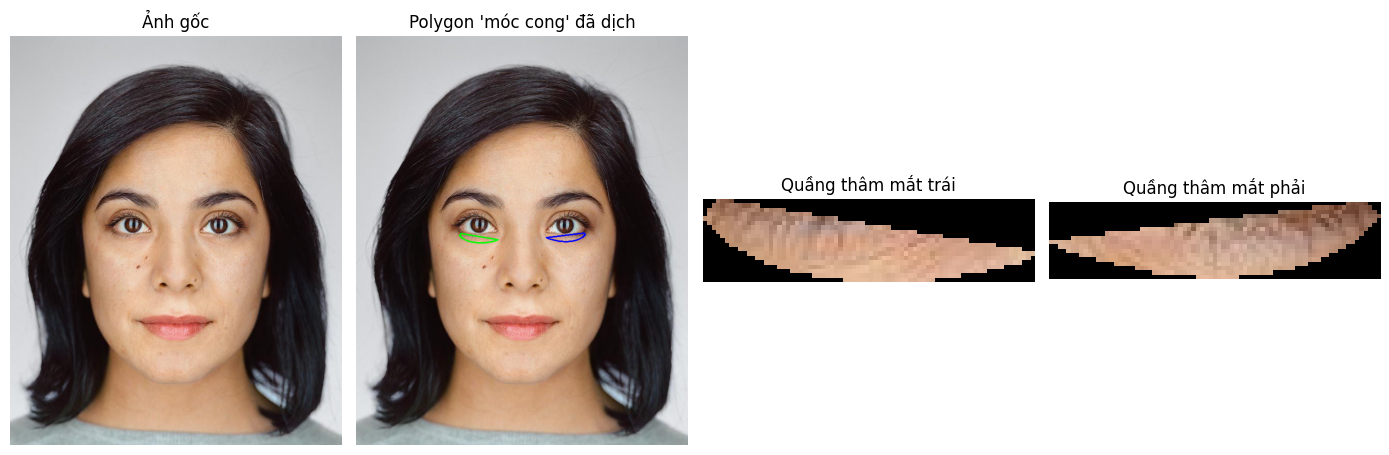

In [28]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# ====== Cấu hình ảnh ======
IMAGE_PATH = "D:/KLTN/SKINTONE/public/test4/0c4e7473e7e82503bf1dc2d2328112a6.jpg"  # Ảnh có mặt bạn vẽ đường trắng

# ====== Khởi tạo FaceMesh ======
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# ====== Landmark polygon cong dưới mắt ======
LEFT_CURVE_IDS = [133, 155, 154, 153, 145, 144, 163, 7, 33, 246]
RIGHT_CURVE_IDS = [362, 382, 381, 380, 374, 373, 390, 249, 263, 466]

def get_shifted_polygon_points(landmarks, indices, image_shape, y_offset=15):
    """Lấy polygon và dịch toàn bộ xuống dưới"""
    h, w, _ = image_shape
    points = []
    for idx in indices:
        x = int(landmarks[idx].x * w)
        y = int(landmarks[idx].y * h) + y_offset  # Dịch xuống
        points.append((x, y))
    return np.array(points, dtype=np.int32)

def extract_region(image, landmarks, indices, y_offset=20):
    points = get_shifted_polygon_points(landmarks, indices, image.shape, y_offset)

    # Tạo mask và cắt
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [points], 255)
    result = cv2.bitwise_and(image, image, mask=mask)

    x, y, w_box, h_box = cv2.boundingRect(points)
    result_cropped = result[y:y+h_box, x:x+w_box]

    return result_cropped, points

# ====== Xử lý ảnh ======
image = cv2.imread(IMAGE_PATH)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb)

if results.multi_face_landmarks:
    landmarks = results.multi_face_landmarks[0].landmark

    # Trích vùng
    left_crop, left_poly = extract_region(image, landmarks, LEFT_CURVE_IDS, y_offset=20)
    right_crop, right_poly = extract_region(image, landmarks, RIGHT_CURVE_IDS, y_offset=15)

    # Debug ảnh có vẽ polygon
    debug_img = image.copy()
    cv2.polylines(debug_img, [left_poly], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.polylines(debug_img, [right_poly], isClosed=True, color=(255, 0, 0), thickness=2)

    # ====== Hiển thị kết quả ======
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
    plt.title("Polygon 'móc cong' đã dịch")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(left_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt trái")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(right_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt phải")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

else:
    print("Không phát hiện khuôn mặt.")


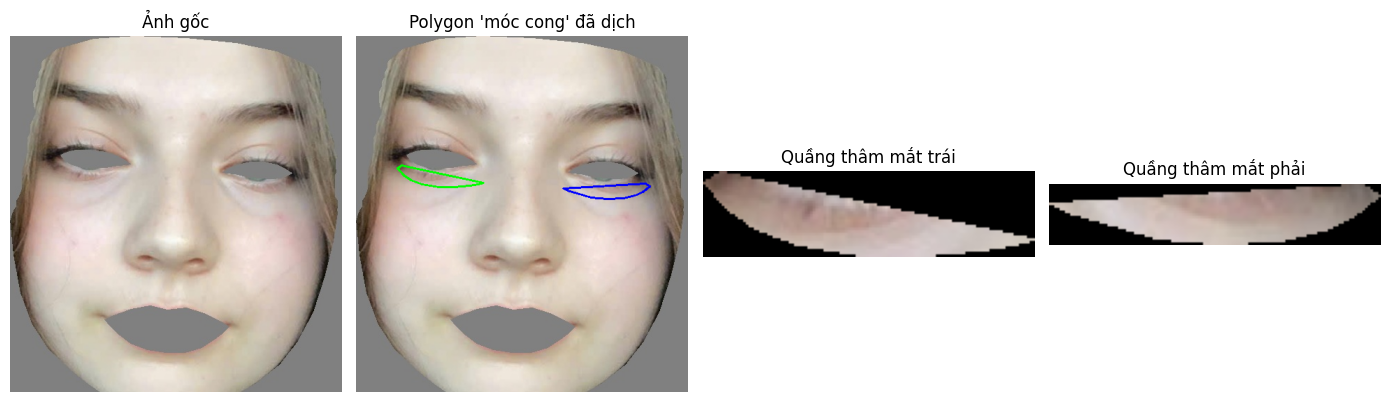

In [76]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# ====== Cấu hình ảnh ======
IMAGE_PATH = "D:/KLTN/SKINTONE/pre_processing/data1/output_face_crop/light/z6661727968179_3769bba4735b1308432330780a6e3f5a.jpg"  # Ảnh có mặt bạn vẽ đường trắng

# ====== Khởi tạo FaceMesh ======
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# ====== Landmark polygon cong dưới mắt ======
LEFT_CURVE_IDS = [133, 155, 154, 153, 145, 144, 163, 7, 33, 246]
RIGHT_CURVE_IDS = [362, 382, 381, 380, 374, 373, 390, 249, 263, 466]

def get_shifted_polygon_points(landmarks, indices, image_shape, y_offset=15, scale_factor=1.2):
    """Lấy polygon, dịch xuống dưới và mở rộng vùng"""
    h, w, _ = image_shape
    points = []
    # Lấy tọa độ các điểm
    for idx in indices:
        x = landmarks[idx].x * w
        y = landmarks[idx].y * h + y_offset  # Dịch xuống
        points.append([x, y])
    points = np.array(points, dtype=np.float32)
    
    # Tính tâm của đa giác
    centroid = np.mean(points, axis=0)
    
    # Mở rộng các điểm ra ngoài từ tâm
    points = centroid + (points - centroid) * scale_factor
    points = points.astype(np.int32)
    
    return points

def extract_region(image, landmarks, indices, y_offset=20):
    points = get_shifted_polygon_points(landmarks, indices, image.shape, y_offset)
    
    # Tạo mask và cắt
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [points], 255)
    result = cv2.bitwise_and(image, image, mask=mask)
    
    x, y, w_box, h_box = cv2.boundingRect(points)
    result_cropped = result[y:y+h_box, x:x+w_box]
    
    return result_cropped, points

# ====== Xử lý ảnh ======
image = cv2.imread(IMAGE_PATH)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb)

if results.multi_face_landmarks:
    landmarks = results.multi_face_landmarks[0].landmark
    
    # Trích vùng
    left_crop, left_poly = extract_region(image, landmarks, LEFT_CURVE_IDS, y_offset=25)
    right_crop, right_poly = extract_region(image, landmarks, RIGHT_CURVE_IDS, y_offset=25)
    
    # Debug ảnh có vẽ polygon
    debug_img = image.copy()
    cv2.polylines(debug_img, [left_poly], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.polylines(debug_img, [right_poly], isClosed=True, color=(255, 0, 0), thickness=2)
    
    # ====== Hiển thị kết quả ======
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")
    
    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
    plt.title("Polygon 'móc cong' đã dịch")
    plt.axis("off")
    
    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(left_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt trái")
    plt.axis("off")
    
    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(right_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt phải")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

else:
    print("Không phát hiện khuôn mặt.")

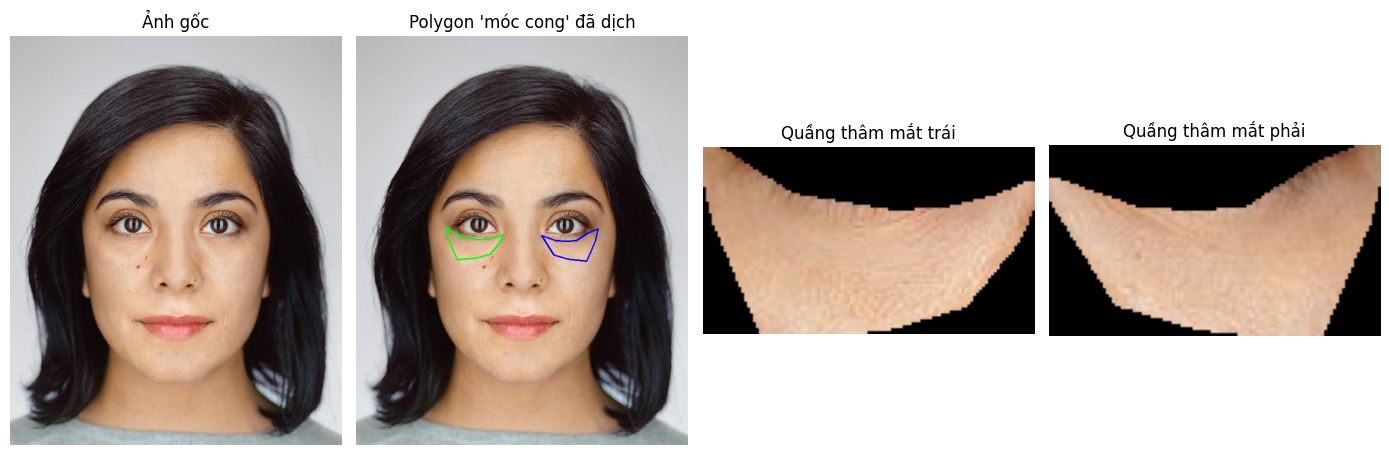

In [20]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# ====== Cấu hình ảnh ======
IMAGE_PATH = "D:/KLTN/SKINTONE/public/test4/0c4e7473e7e82503bf1dc2d2328112a6.jpg"

# ====== Khởi tạo FaceMesh ======
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

# ====== Landmark polygon cong dưới mắt ======
LEFT_CURVE_IDS = [226,110,23,22,26,112,232,120,119,118,31]
RIGHT_CURVE_IDS = [341,252,253,254,255,446,261,347,348,349]


def get_shifted_polygon_points(landmarks, indices, image_shape, y_offset=5, scale_factor=1.2):
    """Lấy polygon móc cong dưới mắt, dịch xuống và scale nở ra"""
    h, w, _ = image_shape
    points = np.array([[landmarks[idx].x * w, landmarks[idx].y * h + y_offset] for idx in indices], dtype=np.float32)
    
    # Tính centroid và scale polygon
    centroid = np.mean(points, axis=0)
    shifted = centroid + (points - centroid) * scale_factor
    return shifted.astype(np.int32)

def extract_region(image, landmarks, indices, y_offset=20, scale_factor=1.2):
    """Tạo mask từ polygon dịch chuyển và cắt ra vùng ảnh"""
    points = get_shifted_polygon_points(landmarks, indices, image.shape, y_offset, scale_factor)

    # Tạo mask có làm mịn cạnh bằng GaussianBlur (optional)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [points], 255)
    mask = cv2.GaussianBlur(mask, (5, 5), 0)  # Làm mịn rìa mask
    
    # Áp dụng mask để cắt vùng mắt
    masked = cv2.bitwise_and(image, image, mask=mask)
    
    # Cắt theo bounding box
    x, y, w_box, h_box = cv2.boundingRect(points)
    cropped = masked[y:y+h_box, x:x+w_box]
    return cropped, points

# ====== Xử lý ảnh ======
image = cv2.imread(IMAGE_PATH)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb)

if results.multi_face_landmarks:
    landmarks = results.multi_face_landmarks[0].landmark

    # Cắt vùng quầng thâm mắt
    left_crop, left_poly = extract_region(image, landmarks, LEFT_CURVE_IDS, y_offset=5)
    right_crop, right_poly = extract_region(image, landmarks, RIGHT_CURVE_IDS, y_offset=5)
    
    # Ảnh debug với polygon
    debug_img = image.copy()
    cv2.polylines(debug_img, [left_poly], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.polylines(debug_img, [right_poly], isClosed=True, color=(255, 0, 0), thickness=2)

    # ====== Hiển thị ======
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
    plt.title("Polygon 'móc cong' đã dịch")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(left_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt trái")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(right_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt phải")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

else:
    print("Không phát hiện khuôn mặt.")


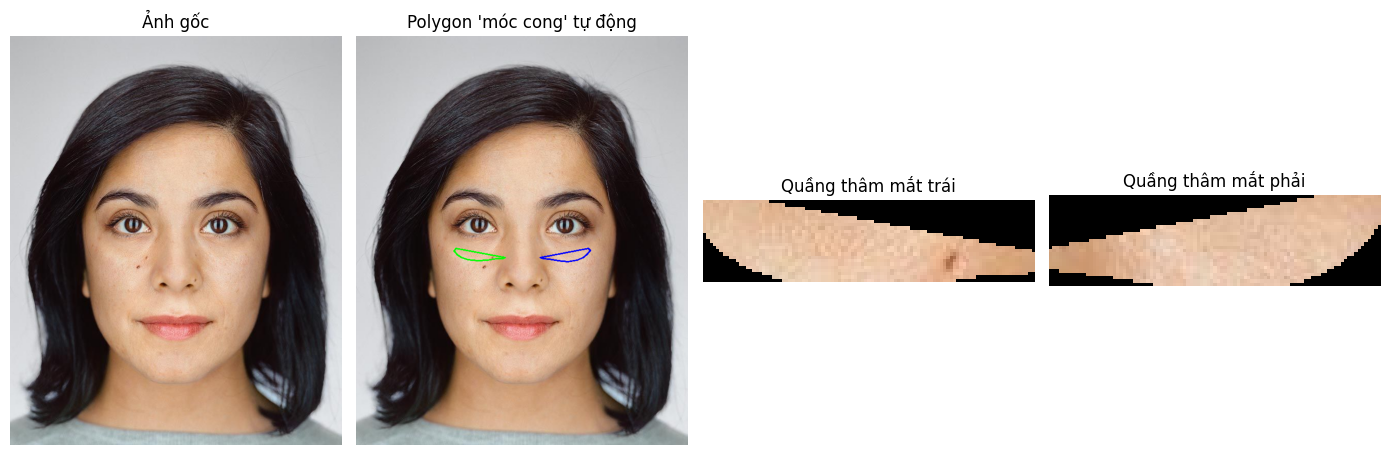

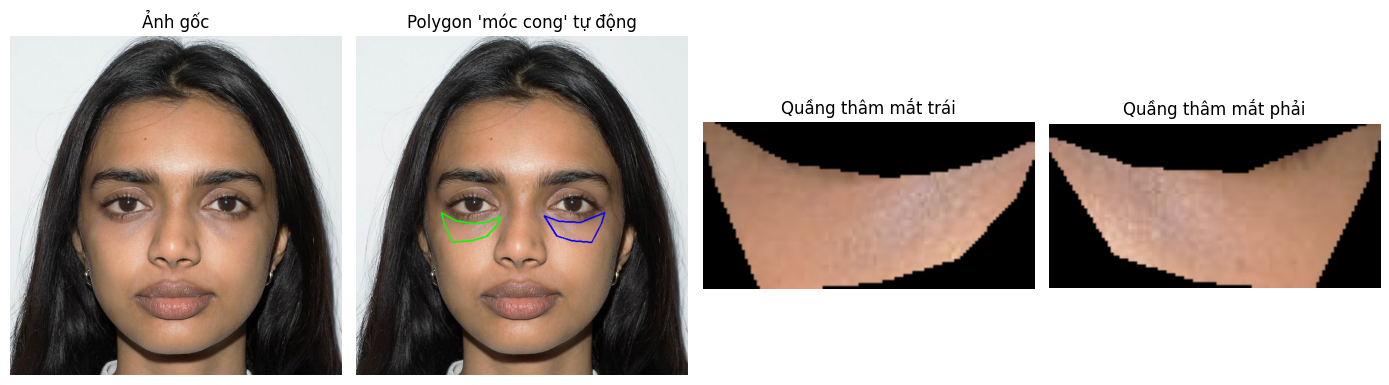

In [13]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# ====== Cấu hình đường dẫn ảnh ======
IMAGE_PATH="D:/KLTN/SKINTONE/public/md/a.jpg"

# ====== Khởi tạo FaceMesh ======
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, refine_landmarks=True)

# ====== Landmark polygon móc cong dưới mắt (mở rộng nhẹ) ======
LEFT_CURVE_IDS = [226,110,23,22,26,112,232,120,119,118,31]
RIGHT_CURVE_IDS = [341,252,254,255,446,261,347,348,349]



# ====== Hàm tạo polygon đã dịch và scale nhẹ ======
def get_shifted_polygon_points(landmarks, indices, image_shape, y_offset=15, scale_factor=1.1):
    h, w, _ = image_shape
    points = np.array([[landmarks[idx].x * w, landmarks[idx].y * h + y_offset] for idx in indices], dtype=np.float32)
    centroid = np.mean(points, axis=0)
    shifted = centroid + (points - centroid) * scale_factor
    return shifted.astype(np.int32)

# ====== Hàm trích vùng quầng thâm mắt trái/phải (đã tối ưu) ======
def extract_eye_shadow_region(image, landmarks, indices, side="left"):
    h, w, _ = image.shape

    # === Tính vị trí mắt và mũi để điều chỉnh offset ===
    nose_tip = landmarks[1]
    eye_bottom_idx = 145 if side == "left" else 374
    eye_bottom = landmarks[eye_bottom_idx]

    eye_y = eye_bottom.y * h
    nose_y = nose_tip.y * h

    # === Tính offset nhẹ để không quá đà ===
    y_offset = int((nose_y - eye_y) * 0.30)  # dịch nhẹ xuống dưới mắt
    y_offset = max(10, min(y_offset, 12))

    scale_factor = 1.18  # Giữ gọn, không làm bè polygon

    # === Tạo polygon và mask mịn ===
    points = get_shifted_polygon_points(landmarks, indices, image.shape, y_offset, scale_factor)
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [points], 255)
    mask = cv2.GaussianBlur(mask, (3, 3), 0)  # Mịn rìa mask

    # Áp dụng mask lên ảnh
    masked = cv2.bitwise_and(image, image, mask=mask)

    # Cắt vùng bounding box
    x, y, w_box, h_box = cv2.boundingRect(points)
    cropped = masked[y:y+h_box, x:x+w_box]
    return cropped, points

# ====== Xử lý ảnh ======
image = cv2.imread(IMAGE_PATH)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = face_mesh.process(rgb)

if results.multi_face_landmarks:
    landmarks = results.multi_face_landmarks[0].landmark

    # Trích vùng quầng thâm mắt trái/phải
    left_crop, left_poly = extract_eye_shadow_region(image, landmarks, LEFT_CURVE_IDS, side="left")
    right_crop, right_poly = extract_eye_shadow_region(image, landmarks, RIGHT_CURVE_IDS, side="right")

    # Ảnh debug có polygon vẽ lên
    debug_img = image.copy()
    cv2.polylines(debug_img, [left_poly], isClosed=True, color=(0, 255, 0), thickness=2)
    cv2.polylines(debug_img, [right_poly], isClosed=True, color=(255, 0, 0), thickness=2)

    # ====== Hiển thị kết quả ======
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(debug_img, cv2.COLOR_BGR2RGB))
    plt.title("Polygon 'móc cong' tự động")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(cv2.cvtColor(left_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt trái")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(right_crop, cv2.COLOR_BGR2RGB))
    plt.title("Quầng thâm mắt phải")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

else:
    print("Không phát hiện khuôn mặt.")
